<a href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Lab-Identification_Arbres/Identification_arbre_reseau_convolutif_et_transfert_colab.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter) 
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables.

# Identification d'arbres à partir de leur écorce
## Réseau convolutif et apprentissage par transfert

##### Copyright 2019 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Apprentissage par transfert et paufinage

In [19]:
import os

In [20]:
# Note that we did not use Acer platanoides (2), Pinus rigida (15) and Populus grandidentata (18)
# since we did not collect enough images in these categories to obtain meaningful results.
data_ecorces = {
    'SAB': 1,  # Pas assez d'espace disque
    'ERB': 2,  # Pas assez de spécimens - seulement 1
    'ERR': 3, 
    'ERS': 4, 
    'BOJ': 5, 
    'BOP': 6,
    'HEG': 7,  # Pas assez d'espace disqe
    'FRA': 8, 
    'MEL': 9,  # Pas assez d'espace disque
    'OSV': 10, # Pas assez d'espace disque
    'EPO': 11,
    'EPB': 12,
    'EPN': 13,
    'EPR': 14,
    'PID': 15, # Pas assez de spécimens - seulement 4
    'PIR': 16, # Pas assez d'espace disque
    'PIB': 17, # Pas assez d'espace disque
    'PEG': 18, # Pas assez de spécimens - seulement 3
    'PET': 19, # Pas assez d'espace disque
    'CHR': 20,
    'THO': 21, # Pas assez d'espace disque
    'PRU': 22, # Pas assez d'espace disque
    'ORA': 23  # Pas assez d'espace disque
}

noms_arbres = {
            1: '\emph{Abies balsamea} - Sapin Baumier - Balsam fir',
            2: '\emph{Acer platanoides} - Érable de Norvège - Norway maple',
            3: '\emph{Acer rubrum} - Érable rouge - Red maple',
            4: '\emph{Acer saccharum} - Érable à sucre - Sugar maple',
            5: '\emph{Betula alleghaniensis} - Bouleau jaune - Yellow birch',
            6: '\emph{Betula papyrifera} - Bouleau à papier - White birch',
            7: '\emph{Fagus grandifolia} - Hêtre à grandes feuilles - American beech',
            8: "\emph{Fraxinus americana} - Frêne d'Amérique - White ash",
            9: '\emph{Larix laricina} - Mélèze - Tamarack',
            10: '\emph{Ostrya virginiana} - Ostryer de Virginie - American hophornbeam',
            11: '\emph{Picea abies} - Épinette de Norvège - Norway spruce',
            12: '\emph{Picea glauca} - Épinette blanche - White spruce',
            13: '\emph{Picea mariana} - Épinette noire - Black spruce',
            14: '\emph{Picea rubens} - Épinette rouge - Red spruce',
            15: '\emph{Pinus rigida} - Pin rigide - Pitch pine',
            16: '\emph{Pinus resinosa} - Pin rouge - Red pine',
            17: '\emph{Pinus strobus} - Pin blanc - Eastern white pine',
            18: '\emph{Populus grandidentata} - Peuplier à grandes dents - Big-tooth aspen',
            19: '\emph{Populus tremuloides} - Peuplier faux tremble - Quaking aspen',
            20: '\emph{Quercus rubra} - Chêne rouge - Northern red oak',
            21: '\emph{Thuja occidentalis} - Thuya occidental - Northern white cedar',
            22: '\emph{Tsuga canadensis} - Pruche du Canada - Eastern Hemlock',
            23: "\emph{Ulmus americana} - Orme d'Amérique - American elm"
        }
print("Code executed")

Code executed


In [21]:
# Création des répertoires de données
# Nous allons créer un répertoire de base `lab_id_arbres` et des répertoires
# pour les données d'entrainement et de test pour chaque étiquette cible

try:
    os.mkdir("/tmp/src/")
except OSError:
    pass
try:
    os.mkdir("/tmp/lab_id_arbres/")
except OSError:
    pass
try:
    os.mkdir("/tmp/lab_id_arbres/training/")
except OSError:
    pass
try:
    os.mkdir("/tmp/lab_id_arbres/testing/")
except OSError:
    pass

for arbre_id in data_ecorces.keys():
    print(arbre_id,noms_arbres[data_ecorces[arbre_id]].split('-')[1])
    try:
        os.mkdir("/tmp/lab_id_arbres/training/"+arbre_id)
        os.mkdir("/tmp/lab_id_arbres/testing/"+arbre_id)
    except OSError:
        continue


SAB  Sapin Baumier 
ERB  Érable de Norvège 
ERR  Érable rouge 
ERS  Érable à sucre 
BOJ  Bouleau jaune 
BOP  Bouleau à papier 
HEG  Hêtre à grandes feuilles 
FRA  Frêne d'Amérique 
MEL  Mélèze 
OSV  Ostryer de Virginie 
EPO  Épinette de Norvège 
EPB  Épinette blanche 
EPN  Épinette noire 
EPR  Épinette rouge 
PID  Pin rigide 
PIR  Pin rouge 
PIB  Pin blanc 
PEG  Peuplier à grandes dents 
PET  Peuplier faux tremble 
CHR  Chêne rouge 
THO  Thuya occidental 
PRU  Pruche du Canada 
ORA  Orme d'Amérique 


In [22]:
# Référence: https://colab.research.google.com/notebooks/io.ipynb
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import shutil
import zipfile


In [25]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [26]:
url = "https://drive.google.com/file/d/1d2zxg2pt5S8UJIK-E7IuWfGN0d1kxxMw/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/BOJ.zip') # Download file as 'BOJ.zip'.
print('File BOJ.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/BOJ.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File BOJ.zip unzipped')
try:
  os.remove('/tmp/src/BOJ.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File BOJ.zip deleted')
except:
  print("?")


File BOJ.zip uploaded
File BOJ.zip unzipped
?


In [27]:
url= "https://drive.google.com/file/d/12cg6UO4HLnjk5fE_KXtrgdC2s8uGh4Zp/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/BOP.zip') # Download file as 'BOP.zip'.
print('File BOP.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/BOP.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File BOP.zip unzipped')
try:
  os.remove('/tmp/src/BOP.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File BOP.zip deleted')
except:
  print("?")

File BOP.zip uploaded
File BOP.zip unzipped
File BOP.zip deleted


In [28]:
url = "https://drive.google.com/file/d/1Nq19-I-Q577KXMTFrkhlJDhMfclh0cWn/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/CHR.zip') # Download file as 'CHR.zip'.
print('File CHR.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/CHR.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File CHR.zip unzipped')
try:
  os.remove('/tmp/src/CHR.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File CHR.zip deleted')
except:
  print("?")

File CHR.zip uploaded
File CHR.zip unzipped
?


In [29]:
url = "https://drive.google.com/file/d/1K_Ncw8VEiuDZ_iJDbYToMq-GO5dzKHns/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/EPB.zip') # Download file as 'EPB.zip'.
print('File EPB.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/EPB.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File EPB.zip unzipped')
try:
  os.remove('/tmp/src/EPB.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File EPB.zip deleted')
except:
  print("?")

File EPB.zip uploaded
File EPB.zip unzipped
?


In [30]:
url = "https://drive.google.com/file/d/1S309DYmg76SrIA89aVQWXCMwm6CzhN8b/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/EPN.zip') # Download file as 'EPN.zip'.
print('File EPN.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/EPN.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File EPN.zip unzipped')
try:
  os.remove('/tmp/src/EPN.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File EPN.zip deleted')
except:
  print("?")


File EPN.zip uploaded
File EPN.zip unzipped
?


In [31]:
url = "https://drive.google.com/file/d/1fTKEcpYgmRg4spUpcH0FAiAnoRgANafL/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/EPO.zip') # Download file as 'EPO.zip'.
print('File EPO.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/EPO.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File EPO.zip unzipped')
try:
  os.remove('/tmp/src/EPO.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File EPO.zip deleted')
except:
  print("?")

File EPO.zip uploaded
File EPO.zip unzipped
?


In [32]:
url= "https://drive.google.com/file/d/1qRhtZ8LZjH_45fxetG7swg3ok3znk8CJ/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/EPR.zip') # Download file as 'EPR.zip'.
print('File EPR.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/EPR.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File EPR.zip unzipped')
try:
  os.remove('/tmp/src/EPR.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File EPR.zip deleted')
except:
  print("?")

File EPR.zip uploaded
File EPR.zip unzipped
?


In [33]:
# Pas assez de spécimens ?
url= "https://drive.google.com/file/d/1ighbGniKAT_GrPm4RtsIAuN1STg9sjR9/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/ERB.zip') # Download file as 'ERB.zip'.
print('File ERB.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/ERB.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File ERB.zip unzipped')
try:
  os.remove('/tmp/src/ERB.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File ERB.zip deleted')
except:
  print("?")


File ERB.zip uploaded
File ERB.zip unzipped
?


In [34]:
url= "https://drive.google.com/file/d/1rEo1thMNJTgFeTzTOfI11_FPSqMgbHSL/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/ERR.zip') # Download file as 'ERR.zip'.
print('File ERR.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/ERR.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File ERR.zip unzipped')
try:
  os.remove('/tmp/src/ERR.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File ERR.zip deleted')
except:
  print("?")

File ERR.zip uploaded
File ERR.zip unzipped
?


In [35]:
url= "https://drive.google.com/file/d/1ts-t7bOH9DfKj0q0v35nMgKHgVT0ZjyG/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/ERS.zip') # Download file as 'ERS.zip'.
print('File ERS.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/ERS.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File ERS.zip unzipped')
try:
  os.remove('/tmp/src/ERS.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File ERS.zip deleted')
except:
  print("?")


File ERS.zip uploaded
File ERS.zip unzipped
?


In [36]:
url= "https://drive.google.com/file/d/1yLacRGW7JtlFWV5asEXHpAToClL38D64/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/FRA.zip') # Download file as 'FRA.zip'.
print('File FRA.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/FRA.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File FRA.zip unzipped')
try:
  os.remove('/tmp/src/FRA.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File FRA.zip deleted')
except:
  print("?")


File FRA.zip uploaded
File FRA.zip unzipped
?


In [37]:
url= "https://drive.google.com/file/d/1zoJKEIrsCD1XxglgPJkEygumev1xRQ3U/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/HEG.zip') # Download file as 'HEG.zip'.
print('File HEG.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/HEG.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File HEG.zip unzipped')
try:
  os.remove('/tmp/src/HEG.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File HEG.zip deleted')
except:
  print("?")

File HEG.zip uploaded
File HEG.zip unzipped
?


In [38]:
url= "https://drive.google.com/file/d/1Wdy3DDnWfUysXjcIFFq12UFW7tlTYDT2/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/MEL.zip') # Download file as 'MEL.zip'.
print('File MEL.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/MEL.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File MEL.zip unzipped')
try:
  os.remove('/tmp/src/MEL.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File MEL.zip deleted')
except:
  print("?")

File MEL.zip uploaded
File MEL.zip unzipped
?


In [39]:
url= "https://drive.google.com/file/d/19_oYwCAaPfP6vMuqUnAzIQAa39Brxhfi/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/ORA.zip') # Download file as 'ORA.zip'.
print('File ORA.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/ORA.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File ORA.zip unzipped')
try:
  os.remove('/tmp/src/ORA.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File ORA.zip deleted')
except:
  print("?")


File ORA.zip uploaded
File ORA.zip unzipped
?


In [40]:
url= "https://drive.google.com/file/d/1VJCCZN1iwBK2Nzh_PHC9xvw63xiLuXXI/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/OSV.zip') # Download file as 'OSV.zip'.
print('File OSV.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/OSV.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File OSV.zip unzipped')
try:
  os.remove('/tmp/src/OSV.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File OSV.zip deleted')
except:
  print("?")

File OSV.zip uploaded
File OSV.zip unzipped
?


In [41]:
# Pas assez de spécimens 
url= "https://drive.google.com/file/d/1YUWH4IaTnmcoIAavZq8HyXByJxO7_zBg/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/PEG.zip') # Download file as 'PEG.zip'.
print('File PEG.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/PEG.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File PEG.zip unzipped')
try:
  os.remove('/tmp/src/PEG.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File PEG.zip deleted')
except:
  print("?")

File PEG.zip uploaded
File PEG.zip unzipped
?


In [42]:
url= "https://drive.google.com/file/d/13bMkvr_1mRz1TuOcX8-c-LfTSIsNKrve/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/PET.zip') # Download file as 'PET.zip'.
print('File PET.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/PET.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File PET.zip unzipped')
try:
  os.remove('/tmp/src/PET.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File PET.zip deleted')
except:
  print("?")

File PET.zip uploaded
File PET.zip unzipped
?


In [43]:
url= "https://drive.google.com/file/d/13bMkvr_1mRz1TuOcX8-c-LfTSIsNKrve/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/PIB.zip') # Download file as 'PIB.zip'.
print('File PIB.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/PIB.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File PIB.zip unzipped')
try:
  os.remove('/tmp/src/PIB.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File PIB.zip deleted')
except:
  print("?")

File PIB.zip uploaded
File PIB.zip unzipped
?


In [44]:
# Pas assez de spécimens 
url= "https://drive.google.com/file/d/12xswrf4pDmTAcYZDAY9D-0HniLjGJCxp/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/PID.zip') # Download file as 'PIB.zip'.
print('File PID.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/PID.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File PID.zip unzipped')
try:
  os.remove('/tmp/src/PID.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File PID.zip deleted')
except:
  print("?")

File PID.zip uploaded
File PID.zip unzipped
?


In [45]:
url= "https://drive.google.com/file/d/1qny4meuoT-HYZ_KTyPQbQnzLhebkgkfU/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/PIR.zip') # Download file as 'PIR.zip'.
print('File PIR.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/PIR.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File PIR.zip unzipped')
try:
  os.remove('/tmp/src/PIR.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File PIR.zip deleted')
except:
  print("?")

File PIR.zip uploaded
File PIR.zip unzipped
?


In [46]:
url= "https://drive.google.com/file/d/1xQWHQvIbwRRBoi2F27q22_drUeM8m3S8/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/PRU.zip') # Download file as 'PRU.zip'.
print('File PRU.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/PRU.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File PRU.zip unzipped')
try:
  os.remove('/tmp/src/PRU.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File PRU.zip deleted')
except:
  print("?")

File PRU.zip uploaded
File PRU.zip unzipped
?


In [47]:
url= "https://drive.google.com/file/d/1ol2mlYAz5bMfQkwqcnxhCOg4avftYtRe/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/SAB.zip') # Download file as 'SAB.zip'.
print('File SAB.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/SAB.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File SAB.zip unzipped')
try:
  os.remove('/tmp/src/SAB.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File SAB.zip deleted')
except:
  print("?")

File SAB.zip uploaded
File SAB.zip unzipped
?


In [48]:
url= "https://drive.google.com/file/d/1_mI0saGpfxb4wnhElCzxg0WU4OiFHkfP/view?usp=sharing"
file_id = url.split('/')[5]
file = drive.CreateFile({'id':file_id})
file.GetContentFile('/tmp/src/THO.zip') # Download file as 'THO.zip'.
print('File THO.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/THO.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File THO.zip unzipped')
try:
  os.remove('/tmp/src/THO.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File THO.zip deleted')
except:
  print("?")

File THO.zip uploaded
File THO.zip unzipped
?


In [49]:
# Répartition des données d'entraînement et de tests

# Source: 
import os
import random
import shutil

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    print("SOURCE",SOURCE)
    all_source_file_names = set(os.listdir(SOURCE))
    print("all_source_file_names[:3]:",list(all_source_file_names)[:3])
    n_source_files = len(all_source_file_names)
    print("n_source_files:",n_source_files)
    n_training_files = int(n_source_files*SPLIT_SIZE)
    print("n_training_files:",n_training_files)
    random_training_file_names = set(random.sample(list(all_source_file_names), n_training_files))
    print("random_training_file_names[:3]:",list(random_training_file_names)[:3])
    testing_files_names = all_source_file_names - random_training_file_names
    print("testing_files_names[:3]:",list(testing_files_names)[:3])
    for training_file_name in random_training_file_names:
        if (os.path.isfile(SOURCE+training_file_name)) and (os.path.getsize(SOURCE+training_file_name) > 0):
            shutil.copyfile(SOURCE+training_file_name, TRAINING+training_file_name)
    for testing_file_name in testing_files_names:
        if (os.path.isfile(SOURCE+testing_file_name)) and (os.path.getsize(SOURCE+testing_file_name) > 0):
            shutil.copyfile(SOURCE+testing_file_name, TESTING+testing_file_name)
    shutil.rmtree(SOURCE)
    print("Fichier",SOURCE,'détruit')

split_size = 0.8

# SOURCE_DATA_DIR = "/Users/claudecoulombe/Documents/PERSONNEL/LINGUA_CLOM-Expert/Projet_VIARENA/Lab-identification_arbres/ecorces_data"
SOURCE_DATA_DIR = '/tmp/src/'
TRAINING_DIR = "/tmp/lab_id_arbres/training/"
TESTING_DIR = "/tmp/lab_id_arbres/testing/"

for arbre_id in data_ecorces.keys():
    try:
        split_data(os.path.join(SOURCE_DATA_DIR,arbre_id+os.sep),
                   os.path.join(TRAINING_DIR,arbre_id+os.sep),
                   os.path.join(TESTING_DIR,arbre_id+os.sep),
                   split_size)
    except:
        continue

print("Data splitting done!")

SOURCE /tmp/src/SAB/
all_source_file_names[:3]: ['998_SAB_74_GalaxyS5_20170622_102117_19.jpg', '993_SAB_87_GalaxyS5_20170622_091946_16.jpg', '998_SAB_74_GalaxyS5_20170622_102117_8.jpg']
n_source_files: 164
n_training_files: 131
random_training_file_names[:3]: ['993_SAB_87_GalaxyS5_20170622_091946_16.jpg', '998_SAB_74_GalaxyS5_20170622_102117_8.jpg', '999_SAB_76_GalaxyS5_20170622_102352_3.jpg']
testing_files_names[:3]: ['998_SAB_74_GalaxyS5_20170622_102117_19.jpg', '989_SAB_70_GalaxyS5_20170622_091418_10.jpg', '990_SAB_72_GalaxyS5_20170622_091521_17.jpg']
Fichier /tmp/src/SAB/ détruit
SOURCE /tmp/src/ERB/
all_source_file_names[:3]: ['541_ERB_70_GalaxyS5_20170607_151651_39.jpg', '541_ERB_70_GalaxyS5_20170607_151651_13.jpg', '541_ERB_70_GalaxyS5_20170607_151651_12.jpg']
n_source_files: 4
n_training_files: 3
random_training_file_names[:3]: ['541_ERB_70_GalaxyS5_20170607_151651_13.jpg', '541_ERB_70_GalaxyS5_20170607_151651_12.jpg', '541_ERB_70_GalaxyS5_20170607_151651_11.jpg']
testing_files

SAB  Sapin Baumier 
/tmp/lab_id_arbres/training/SAB/980_SAB_56_GalaxyS5_20170615_105130_21.jpg
/tmp/lab_id_arbres/training/SAB/1003_SAB_73_GalaxyS5_20170622_113655_17.jpg
/tmp/lab_id_arbres/training/SAB/980_SAB_56_GalaxyS5_20170615_105130_34.jpg
/tmp/lab_id_arbres/training/SAB/417_SAB_61_Nexus 5_20170608_104003_7.jpg


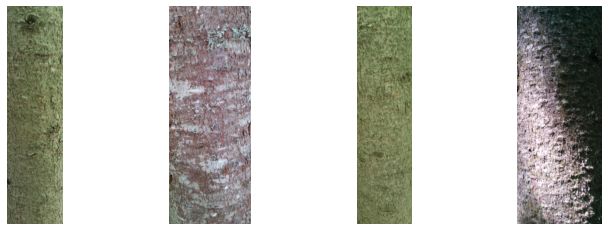

ERB  Érable de Norvège 
/tmp/lab_id_arbres/training/ERB/541_ERB_70_GalaxyS5_20170607_151651_11.jpg
/tmp/lab_id_arbres/training/ERB/541_ERB_70_GalaxyS5_20170607_151651_13.jpg
/tmp/lab_id_arbres/training/ERB/541_ERB_70_GalaxyS5_20170607_151651_12.jpg


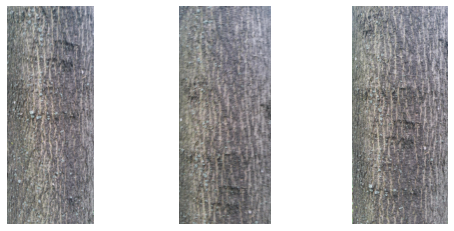

ERR  Érable rouge 
/tmp/lab_id_arbres/training/ERR/761_ERR_95_GalaxyS5_20170615_111207_6.jpg
/tmp/lab_id_arbres/training/ERR/559_ERR_130_GalaxyS7_20170922_130337_6.jpg
/tmp/lab_id_arbres/training/ERR/197_ERR_72_Nexus 5_20170804_111431_3.jpg
/tmp/lab_id_arbres/training/ERR/207_ERR_68_Nexus 5_20170804_112354_4.jpg


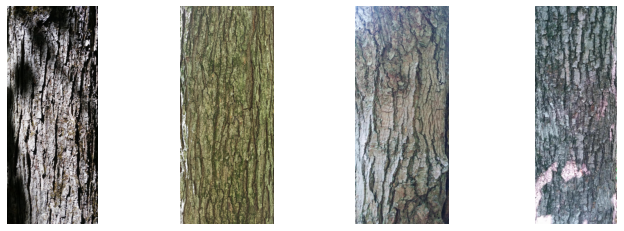

ERS  Érable à sucre 
/tmp/lab_id_arbres/training/ERS/591_ERS_46_GalaxyS7_20170920_171255_12.jpg
/tmp/lab_id_arbres/training/ERS/238_ERS_80_Nexus 5_20170804_101449_3.jpg
/tmp/lab_id_arbres/training/ERS/224_ERS_94_Nexus 5_20170804_093453_4.jpg
/tmp/lab_id_arbres/training/ERS/235_ERS_93_Nexus 5_20170804_100225_11.jpg


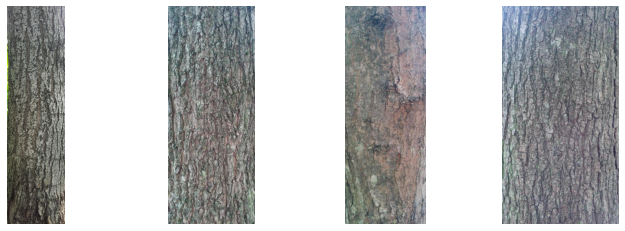

BOJ  Bouleau jaune 
/tmp/lab_id_arbres/training/BOJ/29_BOJ_113_Nexus 5_20170804_105523_4.jpg
/tmp/lab_id_arbres/training/BOJ/640_BOJ_84_GalaxyS5_20170615_104556_18.jpg
/tmp/lab_id_arbres/training/BOJ/646_BOJ_73_GalaxyS5_20170615_115156_8.jpg
/tmp/lab_id_arbres/training/BOJ/644_BOJ_117_GalaxyS5_20170615_111904_17.jpg


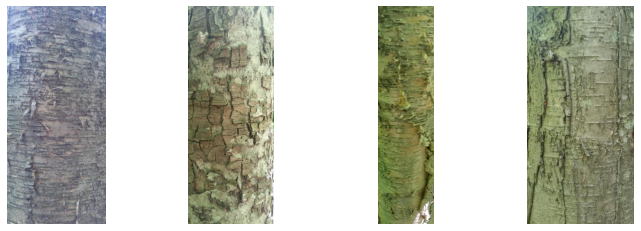

BOP  Bouleau à papier 
/tmp/lab_id_arbres/training/BOP/465_BOP_55_GalaxyS5_20170607_140839_30.jpg
/tmp/lab_id_arbres/training/BOP/472_BOP_48_GalaxyS5_20170607_154209_27.jpg
/tmp/lab_id_arbres/training/BOP/667_BOP_58_GalaxyS5_20170712_111547_27.jpg
/tmp/lab_id_arbres/training/BOP/34_BOP_97_Nexus 5_20170608_092055_6.jpg


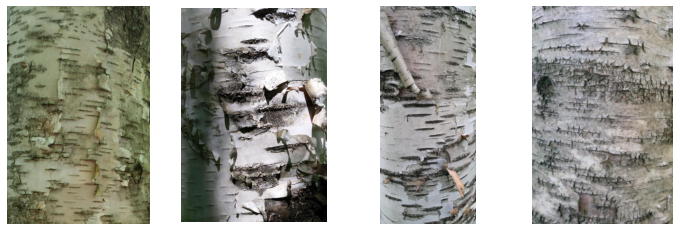

HEG  Hêtre à grandes feuilles 
/tmp/lab_id_arbres/training/HEG/281_HEG_86_Nexus 5_20170804_110706_2.jpg
/tmp/lab_id_arbres/training/HEG/285_HEG_90_Nexus 5_20170906_103913_13.jpg
/tmp/lab_id_arbres/training/HEG/804_HEG_50_GalaxyS5_20170713_112843_17.jpg
/tmp/lab_id_arbres/training/HEG/280_HEG_75_Nexus 5_20170804_092952_3.jpg


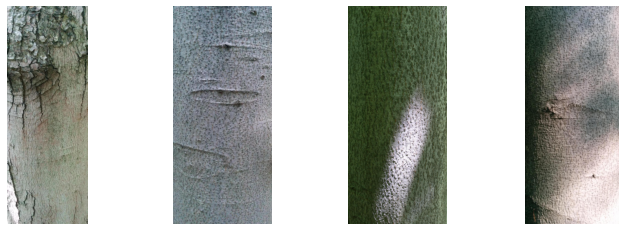

FRA  Frêne d'Amérique 
/tmp/lab_id_arbres/training/FRA/603_FRA_80_GalaxyS5_20170607_145903_2.jpg
/tmp/lab_id_arbres/training/FRA/607_FRA_62_GalaxyS7_20170607_152237_5.jpg
/tmp/lab_id_arbres/training/FRA/250_FRA_144_Nexus 5_20170804_100422_7.jpg
/tmp/lab_id_arbres/training/FRA/599_FRA_121_GalaxyS5_20170607_140207_45.jpg


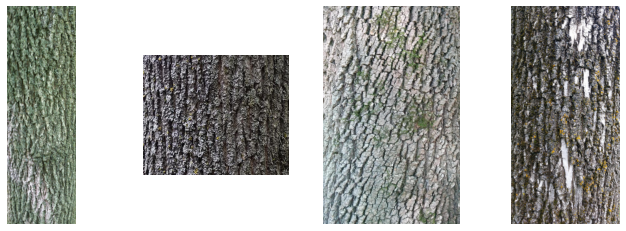

MEL  Mélèze 
/tmp/lab_id_arbres/training/MEL/833_MEL_122_GalaxyS5_20170706_105828_9.jpg
/tmp/lab_id_arbres/training/MEL/819_MEL_65_GalaxyS5_20170706_103426_17.jpg
/tmp/lab_id_arbres/training/MEL/865_MEL_74_GalaxyS5_20170706_120130_11.jpg
/tmp/lab_id_arbres/training/MEL/876_MEL_134_GalaxyS5_20170706_122009_38.jpg


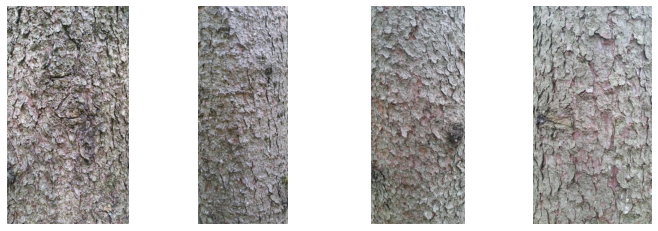

OSV  Ostryer de Virginie 
/tmp/lab_id_arbres/training/OSV/902_OSV_40_GalaxyS5_20170713_122813_18.jpg
/tmp/lab_id_arbres/training/OSV/898_OSV_79_GalaxyS5_20170713_120316_25.jpg
/tmp/lab_id_arbres/training/OSV/900_OSV_46_GalaxyS5_20170713_122523_14.jpg
/tmp/lab_id_arbres/training/OSV/889_OSV_101_GalaxyS5_20170713_105344_6.jpg


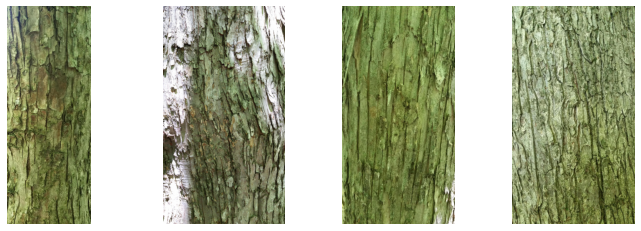

EPO  Épinette de Norvège 
/tmp/lab_id_arbres/training/EPO/749_EPO_119_GalaxyS5_20170615_102134_10.jpg
/tmp/lab_id_arbres/training/EPO/119_EPO_105_Nexus 5_20170817_121237_15.jpg
/tmp/lab_id_arbres/training/EPO/121_EPO_66_Nexus 5_20170817_121414_9.jpg
/tmp/lab_id_arbres/training/EPO/149_EPO_88_Nexus 5_20170921_154716_12.jpg


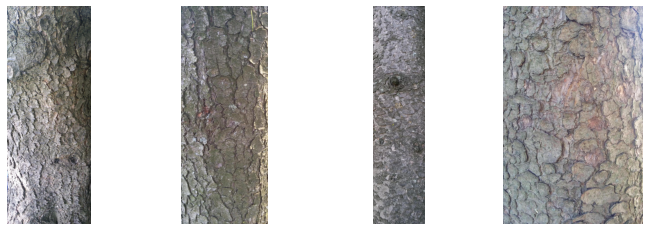

EPB  Épinette blanche 
/tmp/lab_id_arbres/training/EPB/684_EPB_56_GalaxyS5_20170712_122351_3.jpg
/tmp/lab_id_arbres/training/EPB/104_EPB_101_Nexus 5_20170817_113126_8.jpg
/tmp/lab_id_arbres/training/EPB/95_EPB_76_Nexus 5_20170817_111636_3.jpg
/tmp/lab_id_arbres/training/EPB/96_EPB_68_Nexus 5_20170817_111712_7.jpg


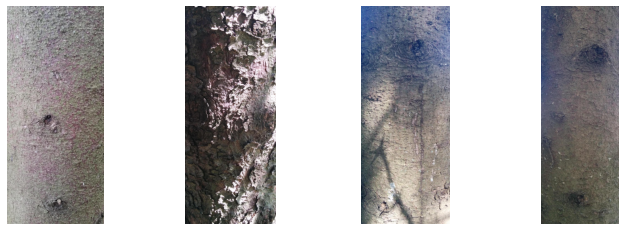

EPN  Épinette noire 
/tmp/lab_id_arbres/training/EPN/736_EPN_76_GalaxyS5_20170622_115215_2.jpg
/tmp/lab_id_arbres/training/EPN/703_EPN_70_GalaxyS5_20170622_101740_8.jpg
/tmp/lab_id_arbres/training/EPN/714_EPN_107_GalaxyS5_20170622_104226_11.jpg
/tmp/lab_id_arbres/training/EPN/698_EPN_107_GalaxyS5_20170622_100739_9.jpg


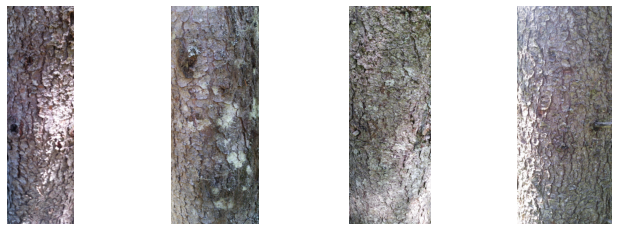

EPR  Épinette rouge 
/tmp/lab_id_arbres/training/EPR/185_EPR_90_Nexus 5_20170608_104331_4.jpg
/tmp/lab_id_arbres/training/EPR/182_EPR_79_Nexus 5_20170608_102808_8.jpg
/tmp/lab_id_arbres/training/EPR/188_EPR_91_Nexus 5_20170608_104634_6.jpg
/tmp/lab_id_arbres/training/EPR/180_EPR_97_Nexus 5_20170608_102619_13.jpg


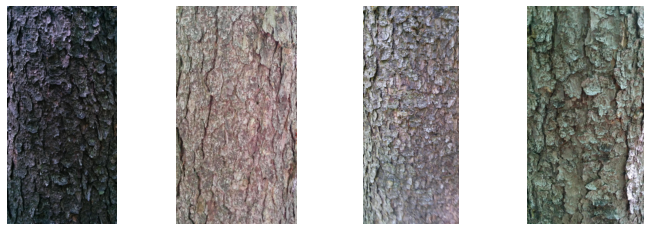

PID  Pin rigide 
/tmp/lab_id_arbres/training/PID/348_PID_76_Nexus 5_20170817_103335_5.jpg
/tmp/lab_id_arbres/training/PID/345_PID_165_Nexus 5_20170817_100536_8.jpg
/tmp/lab_id_arbres/training/PID/345_PID_165_Nexus 5_20170817_100536_12.jpg
/tmp/lab_id_arbres/training/PID/347_PID_96_Nexus 5_20170817_103213_2.jpg


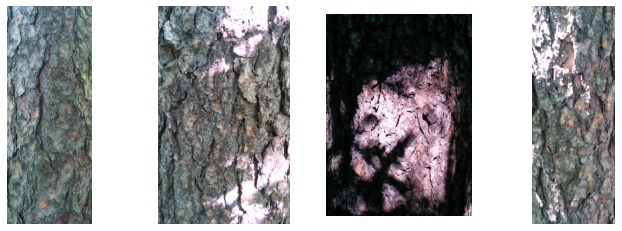

PIR  Pin rouge 
/tmp/lab_id_arbres/training/PIR/360_PIR_103_Nexus 5_20170817_111914_7.jpg
/tmp/lab_id_arbres/training/PIR/374_PIR_98_Nexus 5_20170817_114426_5.jpg
/tmp/lab_id_arbres/training/PIR/362_PIR_97_Nexus 5_20170817_112057_5.jpg
/tmp/lab_id_arbres/training/PIR/364_PIR_106_Nexus 5_20170817_112243_10.jpg


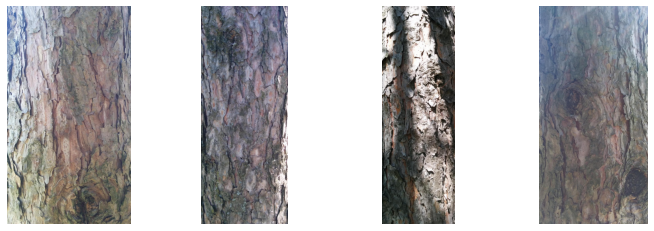

PIB  Pin blanc 


<Figure size 864x288 with 0 Axes>

PEG  Peuplier à grandes dents 
/tmp/lab_id_arbres/training/PEG/905_PEG_46_GalaxyS5_20170713_112124_20.jpg
/tmp/lab_id_arbres/training/PEG/904_PEG_43_GalaxyS5_20170713_111959_6.jpg
/tmp/lab_id_arbres/training/PEG/905_PEG_46_GalaxyS5_20170713_112124_18.jpg
/tmp/lab_id_arbres/training/PEG/905_PEG_46_GalaxyS5_20170713_112124_19.jpg


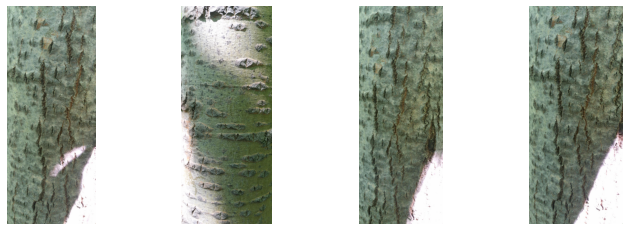

PET  Peuplier faux tremble 
/tmp/lab_id_arbres/training/PET/919_PET_100_GalaxyS5_20170712_104206_12.jpg
/tmp/lab_id_arbres/training/PET/909_PET_89_GalaxyS5_20170712_101809_17.jpg
/tmp/lab_id_arbres/training/PET/911_PET_110_GalaxyS5_20170712_102054_8.jpg
/tmp/lab_id_arbres/training/PET/959_PET_77_GalaxyS5_20170712_115352_3.jpg


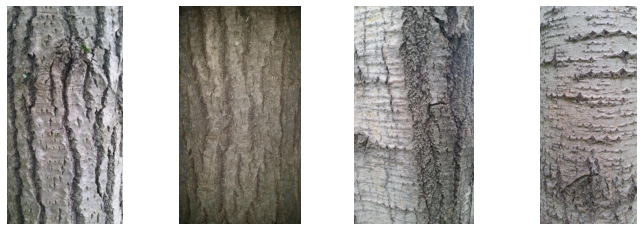

CHR  Chêne rouge 
/tmp/lab_id_arbres/training/CHR/476_CHR_142_GalaxyS7_20170916_142204_36.jpg
/tmp/lab_id_arbres/training/CHR/500_CHR_33_GalaxyS7_20170916_161047_3.jpg
/tmp/lab_id_arbres/training/CHR/505_CHR_48_GalaxyS7_20170916_162435_2.jpg
/tmp/lab_id_arbres/training/CHR/73_CHR_143_Nexus 5_20170906_100849_8.jpg


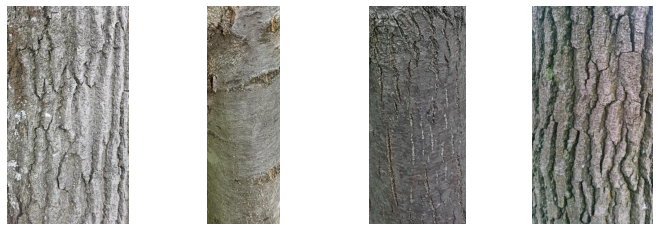

THO  Thuya occidental 
/tmp/lab_id_arbres/training/THO/438_THO_126_Nexus 5_20170810_101818_9.jpg
/tmp/lab_id_arbres/training/THO/431_THO_60_Nexus 5_20170615_134430_4.jpg
/tmp/lab_id_arbres/training/THO/450_THO_59_Nexus 5_20170810_103551_3.jpg
/tmp/lab_id_arbres/training/THO/452_THO_61_Nexus 5_20170810_103710_3.jpg


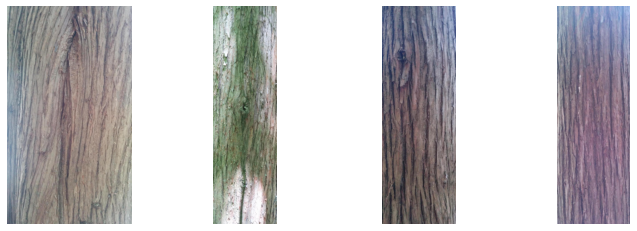

PRU  Pruche du Canada 
/tmp/lab_id_arbres/training/PRU/976_PRU_121_GalaxyS5_20170713_110838_21.jpg
/tmp/lab_id_arbres/training/PRU/381_PRU_80_Nexus 5_20170608_092917_19.jpg
/tmp/lab_id_arbres/training/PRU/379_PRU_85_Nexus 5_20170608_092255_13.jpg
/tmp/lab_id_arbres/training/PRU/378_PRU_116_Nexus 5_20170607_155917_22.jpg


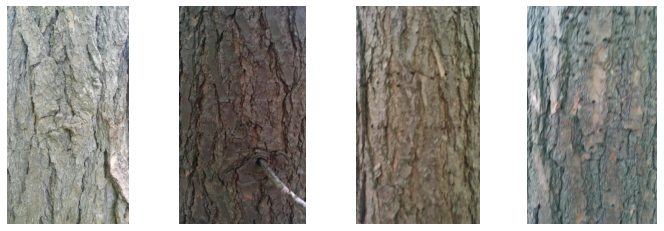

ORA  Orme d'Amérique 
/tmp/lab_id_arbres/training/ORA/629_ORA_255_GalaxyS5_20170607_140656_8.jpg
/tmp/lab_id_arbres/training/ORA/301_ORA_124_Nexus 5_20170810_120937_2.jpg
/tmp/lab_id_arbres/training/ORA/296_ORA_126_Nexus 5_20170810_115431_2.jpg
/tmp/lab_id_arbres/training/ORA/630_ORA_63_GalaxyS5_20170607_142209_44.jpg


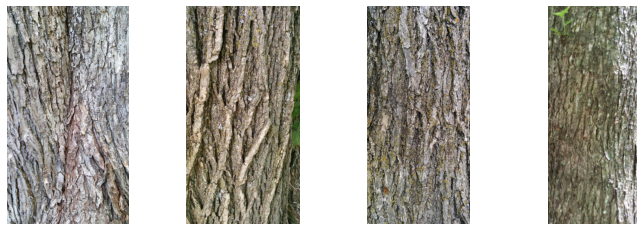

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 4

TRAINING_DIR = "/tmp/lab_id_arbres/training/"

for arbre_id in data_ecorces.keys():
    try:
        dir_path = os.path.join(TRAINING_DIR,arbre_id+os.sep)
        liste_fichiers = os.listdir(os.path.join(TRAINING_DIR,arbre_id+os.sep))
        next_two_pics = [os.path.join(dir_path, fname) for fname in liste_fichiers[0:pic_index]]
        fig = plt.figure(figsize=(12,4))
        print(arbre_id,noms_arbres[data_ecorces[arbre_id]].split('-')[1])
        for i, img_path in enumerate(next_two_pics):
            print(img_path)
            img = mpimg.imread(img_path)
            plt.subplot(1,pic_index,i+1)
            plt.imshow(img)
            plt.axis('Off')
        plt.show()
    except:
        continue

# Création d'un modèle d'apprentissage par transfert

## Importation d'un modèle inception pré-entraîné

In [51]:

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-08-14 04:25:36--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   175MB/s    in 0.5s    

2021-08-14 04:25:37 (175 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [52]:
import os

import keras
print("Keras version:",keras.__version__)
import tensorflow as tf
print("TensorFlow version:",tf.__version__)


from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

pre_trained_model.trainable = True

# Let's take a look to see how many layers are in the pretrained model
nbr_layers_pretrained_model = len(pre_trained_model.layers)
print("Number of layers in the original pretrained model: ", nbr_layers_pretrained_model)

# Fine-tune from this layer onwards
fine_tune_at = 100
print("Number of non trainable layers in the pretrained model: ", fine_tune_at )

# Freeze all the layers before the `fine_tune_at` layer
for layer in pre_trained_model.layers[:fine_tune_at]:
    layer.trainable =  False

# How to get the layer index from the layer name
# https://www.thetopsites.net/article/50151157.shtml
layer_names = [layer.name for layer in pre_trained_model.layers]
last_layer_name = 'mixed5'
last_layer_index = layer_names.index(last_layer_name)
print("Last layer index:",last_layer_index)
print("Number of trainable layers in the pretrained model: ", 
      nbr_layers_pretrained_model-fine_tune_at-(nbr_layers_pretrained_model-last_layer_index))

last_layer = pre_trained_model.get_layer(last_layer_name)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


Keras version: 2.5.0
TensorFlow version: 2.5.0
Number of layers in the original pretrained model:  311
Number of non trainable layers in the pretrained model:  100
Last layer index: 164
Number of trainable layers in the pretrained model:  64
last layer output shape:  (None, 7, 7, 768)


In [53]:
pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [54]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
# *** IMPORTANT *** 23 classes
number_of_target_class = 23
x = layers.Dense(number_of_target_class, activation='softmax')(x)           

transfer_model = Model( pre_trained_model.input, x) 

print("Number of layers in the learning transfer model: ", len(transfer_model.layers))


Number of layers in the learning transfer model:  169


In [55]:
transfer_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [56]:
len(transfer_model.trainable_variables)


44

In [57]:
transfer_model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/lab_id_arbres/training/"
TESTING_DIR = "/tmp/lab_id_arbres/testing/"

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( TESTING_DIR,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150))

print("Data amplification done!")

Found 3075 images belonging to 23 classes.
Found 782 images belonging to 23 classes.
Data amplification done!


In [ ]:
initial_epochs = 20
fine_tune_epochs = 70
total_epochs =  initial_epochs + fine_tune_epochs

# Callbacks are passed to the model via the callbacks argument in fit, 
# which takes a list of callbacks. You can pass any number of callbacks.
callbacks_list = [
    # # Interrupts training when improvement stops
    # keras.callbacks.EarlyStopping(
    #     # Monitors the model’s validation accuracy
    #     monitor='val_accuracy',
    #     # Interrupts training when accuracy has stopped 
    #     # improving for more than one epoch (that is, two epochs)
    #     patience=2,
    # ),
    keras.callbacks.ReduceLROnPlateau(
        # Monitors the model’s validation loss
        monitor='val_loss',
        # Divides the learning rate by 10 when triggered
        factor=0.1,
        # The callback is triggered after the validation loss 
        # has stopped improving for 1 epochs.
        patience=1,
    ) 
]
history_fine = transfer_model.fit(train_generator,
                                  validation_data = validation_generator,
                                  steps_per_epoch = 100,
                                  epochs = total_epochs,
                                  callbacks=callbacks_list,
                                  validation_steps = 10,
                                  verbose = 2)


Epoch 1/90
100/100 - 105s - loss: 2.4885 - accuracy: 0.3218 - val_loss: 1.4738 - val_accuracy: 0.6050
Epoch 2/90
100/100 - 68s - loss: 1.4433 - accuracy: 0.5440 - val_loss: 1.3813 - val_accuracy: 0.5450
Epoch 3/90
100/100 - 69s - loss: 1.2484 - accuracy: 0.6155 - val_loss: 1.2847 - val_accuracy: 0.6550
Epoch 4/90
100/100 - 68s - loss: 1.0493 - accuracy: 0.6777 - val_loss: 0.7229 - val_accuracy: 0.7350
Epoch 5/90
100/100 - 70s - loss: 0.9547 - accuracy: 0.7020 - val_loss: 0.8510 - val_accuracy: 0.7300
Epoch 6/90
100/100 - 68s - loss: 0.6944 - accuracy: 0.7749 - val_loss: 0.6552 - val_accuracy: 0.8100
Epoch 7/90
100/100 - 68s - loss: 0.6847 - accuracy: 0.7739 - val_loss: 0.7462 - val_accuracy: 0.7700
Epoch 8/90
100/100 - 68s - loss: 0.6180 - accuracy: 0.7925 - val_loss: 0.6632 - val_accuracy: 0.7700
Epoch 9/90
100/100 - 70s - loss: 0.6447 - accuracy: 0.7855 - val_loss: 0.5798 - val_accuracy: 0.8150
Epoch 10/90
100/100 - 68s - loss: 0.5884 - accuracy: 0.7965 - val_loss: 0.6247 - val_accur

In [ ]:
import matplotlib.pyplot as plt
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation on training data with dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


In [ ]:
print("IPython Notebook executed")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')